# Data Visualization and Analysis of NHANES Body Metrics

##### 1. Exporting the files
##### 2. Read the two files as numpy matrices named male and female. Each matrix consists of seven
##### 3. ploting histograms of the weights of males and females to visualize the distribution of this feature.
##### 4. Boxplot for male and female weights
##### 5. Compute the basic numerical aggregates
##### 6. add the BMI (Body Mass Index) column to the female matrix
##### 7. Standardizing the Female Dataset
##### 8. Scatterplot Matrix for Standardized Female Data
##### 9. Computing and Adding Ratios
##### 10. Box-and-Whisker Plot for Ratios
##### 11. Advantages and Disadvantages of BMI, Waist-to-Height Ratio, and Waist-to-Hip Ratio
##### 12. .standardised body measurements for the 5 persons with the lowest BMI and the 5 persons with the 5 highest BMI

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr


sns.set(style="whitegrid")


#####  The libraries are successfully imported


## 2. Exporting given two files  

In [ ]:
df = pd.read_csv(r"C:\Users\varma\Downloads\nhanes_adult_male_bmx_2020.csv" )

In [ ]:
df

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,98.8,182.3,42.0,40.1,38.2,108.2,120.4
1,74.3,184.2,41.1,41.0,30.2,94.5,86.8
2,103.7,185.3,47.0,44.0,32.0,107.8,109.6
3,86.0,167.8,39.5,38.4,29.0,106.4,108.3
4,99.4,181.6,40.4,39.9,36.0,120.2,107.0
...,...,...,...,...,...,...,...
4076,114.3,174.5,42.0,35.5,37.0,117.4,119.5
4077,94.3,178.8,37.8,44.6,35.7,105.3,99.3
4078,108.8,168.7,38.6,45.6,33.6,118.0,114.7
4079,79.5,176.4,39.5,42.0,31.4,99.8,97.1


In [ ]:
import pandas as pd

In [ ]:
df1=pd.read_csv(r"C:\Users\varma\Downloads\nhanes_adult_female_bmx_2020.csv" )

In [ ]:
df1

,BMXWT,BMXHT,BMXARML,BMXLEG,BMXARMC,BMXHIP,BMXWAIST
0,97.1,160.2,34.7,40.8,35.8,126.1,117.9
1,91.1,152.7,33.5,33.0,38.5,125.5,103.1
2,73.0,161.2,37.4,38.0,31.8,106.2,92.0
3,61.7,157.4,38.0,34.7,29.0,101.0,90.5
4,55.4,154.6,34.6,34.0,28.3,92.5,73.2
...,...,...,...,...,...,...,...
4216,66.8,157.0,32.6,38.4,30.7,103.8,92.5
4217,116.9,167.4,42.2,43.0,40.7,128.4,120.0
4218,73.0,159.6,36.2,37.0,31.4,104.6,99.3
4219,78.6,168.5,38.1,40.2,36.0,102.4,98.5


##### the datasets are downloaded into pandas DataFrames.


##### Next, we convert the data from pandas DataFrames to numpy matrices, which will make it easier to perform numerical operations.


In [ ]:
# Load the datasets
male_df = pd.read_csv(r"C:\Users\varma\Downloads\nhanes_adult_male_bmx_2020.csv")
female_df = pd.read_csv(r"C:\Users\varma\Downloads\nhanes_adult_female_bmx_2020.csv")


male = male_df.to_numpy()
female = female_df.to_numpy()

print("Male data shape:", male.shape)
print("Female data shape:", female.shape)


Male data shape: (4081, 7)
Female data shape: (4221, 7)


### 3.We will plot histograms of the weights of males and females to visualize the distribution of this feature.


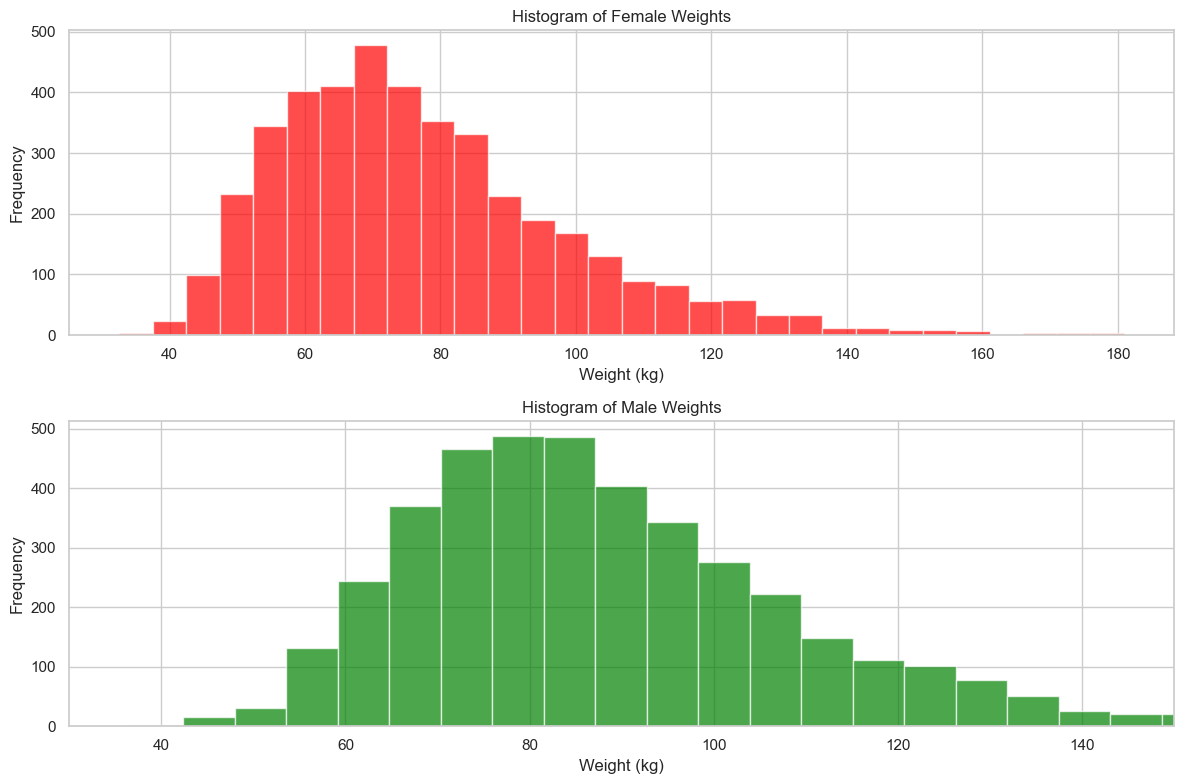

In [ ]:
plt.figure(figsize=(12, 8))

# Female weights histogram
plt.subplot(2, 1, 1)
plt.hist(female[:, 0], bins=30, alpha=0.7, color='red')
plt.title('Histogram of Female Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

# Male weights histogram
plt.subplot(2, 1, 2)
plt.hist(male[:, 0], bins=30, alpha=0.7, color='green')
plt.title('Histogram of Male Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

# Set x-axis limits to be the same
plt.xlim(30, 150)

plt.tight_layout()
plt.show()


#####  The histograms show that the weights of both males and females are approximately normally distributed, with most weights falling between 50 kg and 110 kg.


## 4. Boxplot for male and female weights

C:\Users\varma\AppData\Local\Temp\ipykernel_2268\556032746.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female[:, 0], male[:, 0]], labels=['Female', 'Male'])


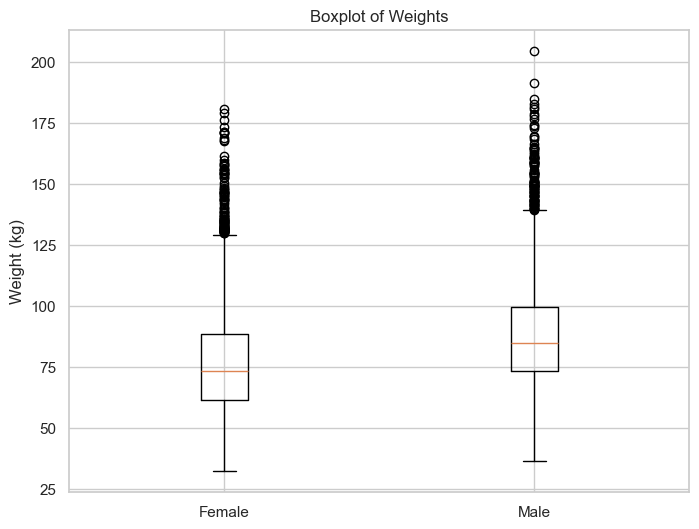

In [ ]:
plt.figure(figsize=(8, 6))

# Boxplot for male and female weights
plt.boxplot([female[:, 0], male[:, 0]], labels=['Female', 'Male'])
plt.title('Boxplot of Weights')
plt.ylabel('Weight (kg)')
plt.show()


##### The boxplot reveals that males generally have higher weights than females, with a slightly larger interquartile range.


# 5. Compute the basic numerical aggregates

In [ ]:
def compute_aggregates(data):
    mean = np.mean(data)
    median = np.median(data)
    std_dev = np.std(data)
    skewness = pd.Series(data).skew()
    return mean, median, std_dev, skewness

female_weights_aggregates = compute_aggregates(female[:, 0])
male_weights_aggregates = compute_aggregates(male[:, 0])

print("Female Weights Aggregates (Mean, Median, Std Dev, Skewness):", female_weights_aggregates)
print("Male Weights Aggregates (Mean, Median, Std Dev, Skewness):", male_weights_aggregates)


Female Weights Aggregates (Mean, Median, Std Dev, Skewness): (np.float64(77.40379057095475), np.float64(73.6), np.float64(21.54250829019315), np.float64(1.033728460112216))
Male Weights Aggregates (Mean, Median, Std Dev, Skewness): (np.float64(88.36454300416565), np.float64(85.0), np.float64(21.418936717962495), np.float64(0.9846430235310972))


#####  Female Weights Aggregates:
    Mean: 77.40
    Median: 73.6
    Standard Deviation: 21.54
    Skewness: 1.03
#####  Male Weights Aggregates:
    Mean: 88.36
    Median: 85.0
    Standard Deviation: 21.42
    Skewness: 0.98
These aggregates provide a concise summary of the central tendency, variability, and distribution shape for the weights of females and males in the dataset.

### 6.We add the BMI (Body Mass Index) column to the female matrix to enhance our analysis.


In [ ]:
# Compute BMI
female_bmi = female[:, 0] / ((female[:, 1] / 100) ** 2)
female = np.column_stack((female, female_bmi))

print("Female data shape with BMI:", female.shape)


Female data shape with BMI: (4221, 8)


#####  The female dataset now includes an additional column for BMI, with a new shape of (4221, 8).


## 7. Standardizing the Female Dataset

In [ ]:
zfemale = (female - female.mean(axis=0)) / female.std(axis=0)

print("Standardized Female Data (zfemale):")
print(zfemale[:5])  # Display the first 5 rows


Standardized Female Data (zfemale):
[[ 0.91429508  0.00895038 -0.56739463  1.13298804  0.55084546  1.08316157
   1.11578462  0.9969677 ]
 [ 0.63577599 -1.05306843 -1.07893145 -1.29349161  1.03221804  1.04475528
   0.265089    1.15617483]
 [-0.2044233   0.15055289  0.5835632   0.26194406 -0.1622991  -0.19064688
  -0.37293272 -0.25927501]
 [-0.7289676  -0.38753664  0.83933161 -0.76464348 -0.66150029 -0.52350135
  -0.45915188 -0.67039085]
 [-1.02141265 -0.78402366 -0.6100227  -0.98240447 -0.78630059 -1.06759039
  -1.45354609 -0.89289859]]


#####  The female dataset has been successfully standardized, with all columns converted to z-scores.


## 8. Scatterplot Matrix for Standardized Female Data

##### We create a scatterplot matrix (pairplot) for selected standardized features and compute Pearson and Spearman correlation coefficients to understand the relationships between them.


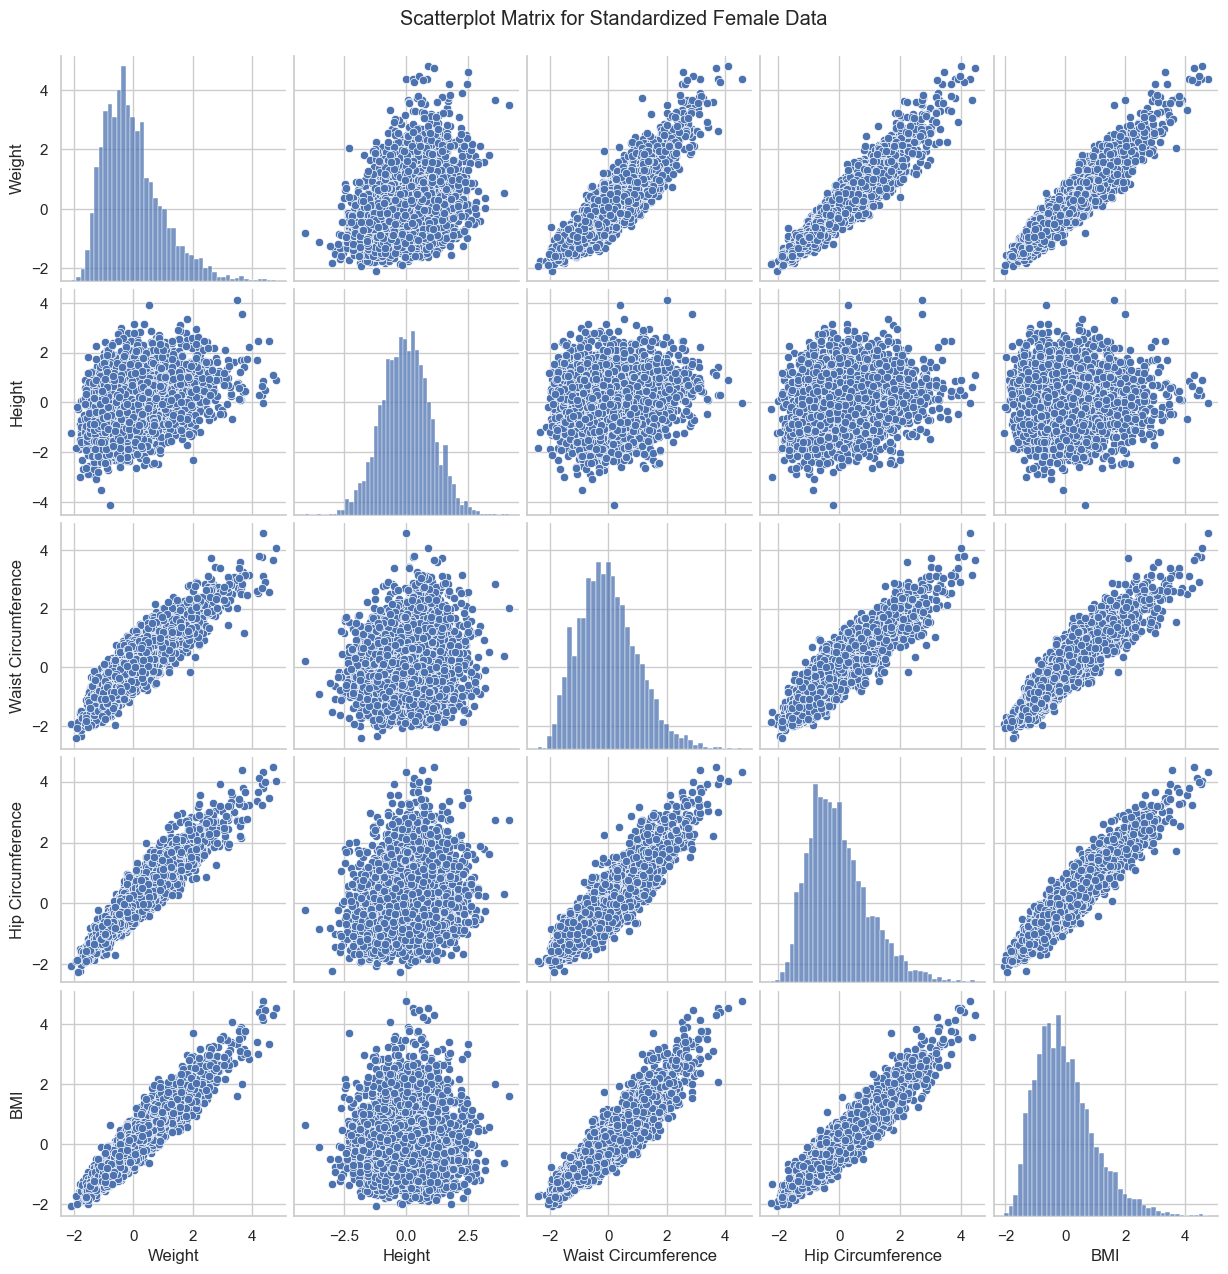

Pearson Correlation Coefficients:
                        Weight    Height  Waist Circumference  \
Weight               1.000000  0.345496             0.904550   
Height               0.345496  1.000000             0.126547   
Waist Circumference  0.904550  0.126547             1.000000   
Hip Circumference    0.946553  0.202895             0.897407   
BMI                  0.945900  0.033077             0.921198   

                     Hip Circumference       BMI  
Weight                        0.946553  0.945900  
Height                        0.202895  0.033077  
Waist Circumference           0.897407  0.921198  
Hip Circumference             1.000000  0.944199  
BMI                           0.944199  1.000000  
Spearman Correlation Coefficients:
                        Weight    Height  Waist Circumference  \
Weight               1.000000  0.338860             0.900169   
Height               0.338860  1.000000             0.108587   
Waist Circumference  0.900169  0.108587       

In [ ]:
# Select the columns of interest
zfemale_df = pd.DataFrame(zfemale, columns=['Weight', 'Height', 'Arm Length', 'Leg Length', 'Arm Circumference', 'Hip Circumference', 'Waist Circumference', 'BMI'])
selected_columns = zfemale_df[['Weight', 'Height', 'Waist Circumference', 'Hip Circumference', 'BMI']]

# Scatterplot matrix
sns.pairplot(selected_columns)
plt.suptitle('Scatterplot Matrix for Standardized Female Data', y=1.02)
plt.show()

# Compute correlation coefficients
correlations = selected_columns.corr()
print("Pearson Correlation Coefficients:\n", correlations)

# Compute Spearman's correlation
spearman_correlations = selected_columns.corr(method='spearman')
print("Spearman Correlation Coefficients:\n", spearman_correlations)


#####  The scatterplot matrix shows strong positive correlations between weight, waist circumference, and hip circumference. Both Pearson and Spearman correlation matrices confirm these relationships.



## 9. Computing and Adding Ratios

##### We compute the waist-to-height and waist-to-hip ratios for both males and females and add these as new columns to their respective matrices.


In [ ]:
# Compute ratios for females
female_waist_height_ratio = female[:, 6] / female[:, 1]
female_waist_hip_ratio = female[:, 6] / female[:, 5]
female = np.column_stack((female, female_waist_height_ratio, female_waist_hip_ratio))

# Compute ratios for males
male_waist_height_ratio = male[:, 6] / male[:, 1]
male_waist_hip_ratio = male[:, 6] / male[:, 5]
male = np.column_stack((male, male_waist_height_ratio, male_waist_hip_ratio))

print("Female data shape with ratios:", female.shape)
print("Male data shape with ratios:", male.shape)


Female data shape with ratios: (4221, 10)
Male data shape with ratios: (4081, 9)


##### Both datasets now include two additional columns for the waist-to-height and waist-to-hip ratios. The shapes are (4221, 10) for females and (4081, 9) for males.


## 10. Box-and-Whisker Plot for Ratios

##### We draw box-and-whisker plots to compare the distributions of waist-to-height and waist-to-hip ratios between males and females.


C:\Users\varma\AppData\Local\Temp\ipykernel_2268\3508781333.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female[:, -2], male[:, -2], female[:, -1], male[:, -1]],


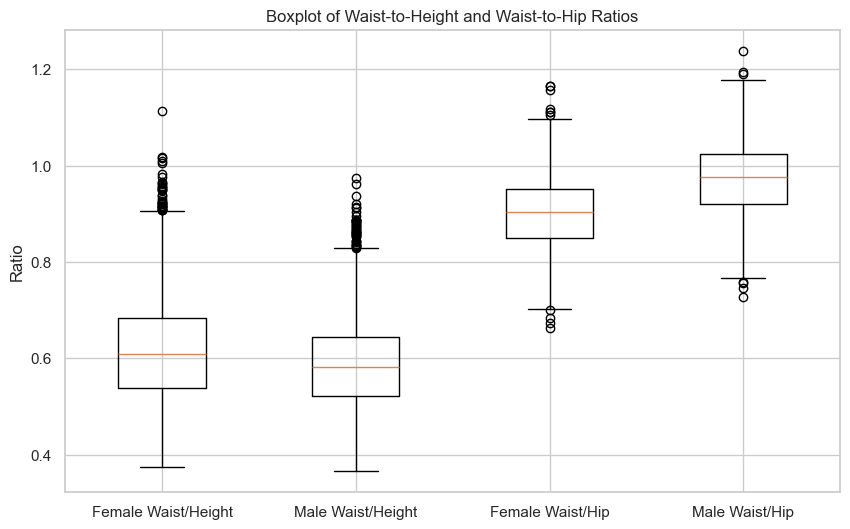

In [ ]:
plt.figure(figsize=(10, 6))

# Boxplot for waist-to-height and waist-to-hip ratios
plt.boxplot([female[:, -2], male[:, -2], female[:, -1], male[:, -1]],
            labels=['Female Waist/Height', 'Male Waist/Height', 'Female Waist/Hip', 'Male Waist/Hip'])
plt.title('Boxplot of Waist-to-Height and Waist-to-Hip Ratios')
plt.ylabel('Ratio')
plt.show()


##### The boxplots indicate that males generally have higher waist-to-height ratios than females, while


## 11. Advantages and Disadvantages of BMI, Waist-to-Height Ratio, and Waist-to-Hip Ratio

#### **Advantages and Disadvantages:**

**BMI:**
- *Advantages:* Simple to calculate, widely used, good general indicator of health.
- *Disadvantages:* Does not account for muscle mass, distribution of fat, or body shape.

**Waist-to-Height Ratio:**
- *Advantages:* Correlates well with cardiovascular risk and other health issues, takes into account central obesity.
- *Disadvantages:* Less commonly used, can be influenced by body proportions.

**Waist-to-Hip Ratio:**
- *Advantages:* Good indicator of fat distribution, useful for assessing risk of heart disease and type 2 diabetes.
- *Disadvantages:* Can be less accurate in very muscular individuals, not as widely adopted as BMI.


### 12 .standardised body measurements for the 5 persons with the lowest BMI and the 5 persons with the 5 highest BMI

In [ ]:
# Get indices of the 5 lowest and highest BMIs
lowest_bmi_indices = np.argsort(zfemale[:, -3])[:5]
highest_bmi_indices = np.argsort(zfemale[:, -3])[-5:]

# Extract the corresponding rows
lowest_bmi_measurements = zfemale[lowest_bmi_indices]
highest_bmi_measurements = zfemale[highest_bmi_indices]

# Display the results
print("Standardized Body Measurements for the 5 Persons with the Lowest BMI:")
print(lowest_bmi_measurements)

print("\nStandardized Body Measurements for the 5 Persons with the Highest BMI:")
print(highest_bmi_measurements)


Standardized Body Measurements for the 5 Persons with the Lowest BMI:
[[-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.94177591]
 [-1.80590812 -2.99302277 -2.35777349 -1.85344845 -1.73121713 -2.20697684
  -1.52252141 -1.31226827]
 [-2.07978523 -1.22299143 -1.5478402  -1.16905675 -2.1947611  -2.0405496
  -1.94212128 -2.05024028]
 [-1.74092033  0.06559138 -0.26899816  0.85300962 -2.64047645 -2.01494541
  -1.68921177 -1.88695626]
 [-1.76413025 -1.19467093 -1.80360861 -0.64020862 -1.76687436 -1.95733598
  -2.33298143 -1.67404787]]

Standardized Body Measurements for the 5 Persons with the Highest BMI:
[[ 4.8042785   0.88688592  2.11817365  1.81737973  3.77782461  4.02124236
   4.08172343  4.54270932]
 [ 4.2472403   0.29215539  1.86240524 -0.98240447  2.3693641   4.10445598
   3.81731803  4.39649161]
 [ 4.36328993 -0.03353037 -0.05585782 -0.17357792  2.77942222  4.31569054
   4.57029862  4.76243308]
 [ 3.66235019  0.63200141  0.5835632   0.38637892 